In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [90]:

df = pd.read_csv('/home/danial/project/learning_python/Assagnment_20/BostonHousing.csv')
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

print(df.head())

y_train = df['medv']

x_train = df[['rm', 'age' , 'dis']]


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [91]:
x_train

,rm,age,dis
0,6.575,65.2,4.0900
1,6.421,78.9,4.9671
2,7.185,61.1,4.9671
3,6.998,45.8,6.0622
4,7.147,54.2,6.0622
...,...,...,...
501,6.593,69.1,2.4786
502,6.120,76.7,2.2875
503,6.976,91.0,2.1675
504,6.794,89.3,2.3889


In [92]:
y_train

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 501, dtype: float64

In [93]:
# print(x_train)
# print(x_train.shape)

y_train = np.array(y_train)
x_train = np.array(x_train)

# x_train = x_train.reshape(501,1)
Y_train = y_train.reshape(501,1)

# print(x_train)
# print(y_train)

print(x_train.shape)
print(y_train.shape)

w = np.random.rand(1,1)
b = np.random.rand(1,1)

(501, 3)
(501,)


In [94]:
# X_train = np.array(X_train)
# Y_train = np.array(Y_train)
df['combined_feature'] = x_train.mean(axis=1)
X_train = np.array(df['combined_feature'])
X_train = X_train.reshape(501,1)

In [95]:
X_train

array([[25.28833333],
       [30.09603333],
       [24.41736667],
       [19.62006667],
       [22.46973333],
       [23.73073333],
       [26.0575    ],
       [36.07416667],
       [37.2377    ],
       [32.83203333],
       [31.7119    ],
       [16.77996667],
       [24.15216667],
       [31.68596667],
       [22.27753333],
       [13.24453333],
       [30.6493    ],
       [15.28416667],
       [26.34116667],
       [35.82263333],
       [33.0591    ],
       [33.93963333],
       [36.63606667],
       [34.80786667],
       [31.91786667],
       [33.59833333],
       [33.10013333],
       [35.11656667],
       [32.73766667],
       [34.682     ],
       [36.749     ],
       [30.64666667],
       [34.8294    ],
       [35.58526667],
       [23.53963333],
       [17.09473333],
       [13.33776667],
       [11.26536667],
       [ 9.40836667],
       [ 5.1303    ],
       [ 6.1633    ],
       [ 6.14396667],
       [17.2633    ],
       [14.8608    ],
       [14.7288    ],
       [32

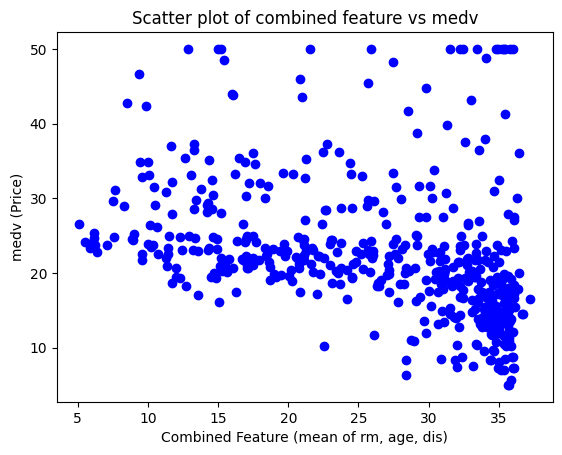

In [96]:
# X_train.shape

plt.scatter(X_train, y_train, color='blue')
plt.xlabel('Combined Feature (mean of rm, age, dis)')
plt.ylabel('medv (Price)')
plt.title('Scatter plot of combined feature vs medv')
plt.show()

In [97]:
# X_train = X_train.reshape(100,1)
# Y_train = Y_train.reshape(100,1)

In [98]:
X_train.shape

(501, 1)

In [99]:
Y_train.shape

(501, 1)

In [100]:
class AdalineRegressor:
    def __init__(self):
        pass
    def fit(self,X_train,Y_train):
        # w = (X_train.T*X_train)^-1*X_train.T*Y_train
        self.w = np.matmul(inv(np.matmul(X_train.T,X_train)),np.matmul(X_train.T,Y_train))
        return self.w 
    def predict(self,X_test):
        y_pred = np.matmul(X_test,self.w)
        return y_pred
    def evaluate(self, X_test, Y_test):
        y_pred = np.matmul(X_test, self.w)
        # print("aval",y_pred)
        subtract = np.abs(np.subtract(Y_test, y_pred))
        # print("dovomi",subtract)
        MAE = np.mean(subtract)
        return MAE

In [101]:
model = AdalineRegressor()
w = model.fit(X_train,Y_train)
print(w)



[[0.73498304]]


In [102]:
y_pred = np.matmul(X_train,w)
y_pred

array([[18.58649618],
       [22.12007415],
       [17.94635045],
       [14.4204163 ],
       [16.51487297],
       [17.44168659],
       [19.15182063],
       [26.51390078],
       [27.36907805],
       [24.13098776],
       [23.30770875],
       [12.33299096],
       [17.75143294],
       [23.28864819],
       [16.37360923],
       [ 9.73450741],
       [22.52671577],
       [11.23360332],
       [19.36031082],
       [26.32902804],
       [24.29787791],
       [24.94505498],
       [26.92688775],
       [25.58319175],
       [23.45909076],
       [24.69420526],
       [24.32803671],
       [25.81008102],
       [24.06162986],
       [25.49068189],
       [27.00989184],
       [22.52478031],
       [25.59901839],
       [26.15456757],
       [17.30123133],
       [12.56433912],
       [ 9.80303233],
       [ 8.27985347],
       [ 6.91498996],
       [ 3.7706835 ],
       [ 4.52992099],
       [ 4.51571131],
       [12.68823276],
       [10.922436  ],
       [10.82541824],
       [23

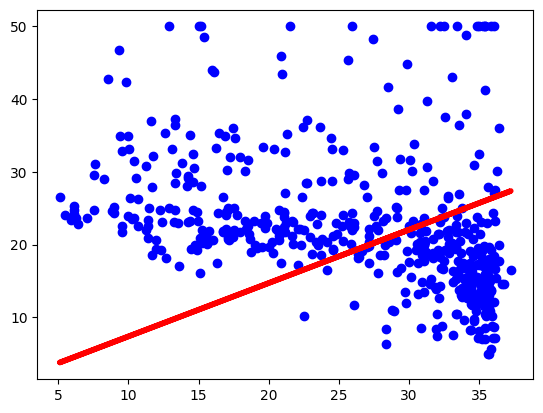

In [103]:
plt.scatter(X_train,Y_train,c='blue')
plt.plot(X_train,y_pred,c='red' , lw=4)


In [104]:
X_train_1 = df['rm']
X_train_2 = df['age']
X_train_3 = df['dis']

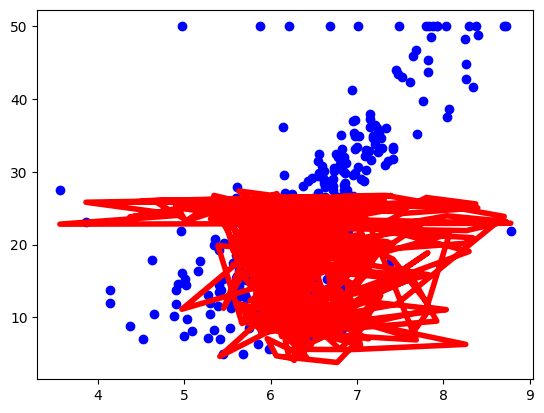

In [105]:
plt.scatter(X_train_1,Y_train,c='blue')
plt.plot(X_train_1,y_pred,c='red' , lw=4)

### The problem is not with the code, the problem is with the data. The data is completely flawed. If you find the correct data, test the correct data. I still say the problem is with the data. The data has a very big flaw.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

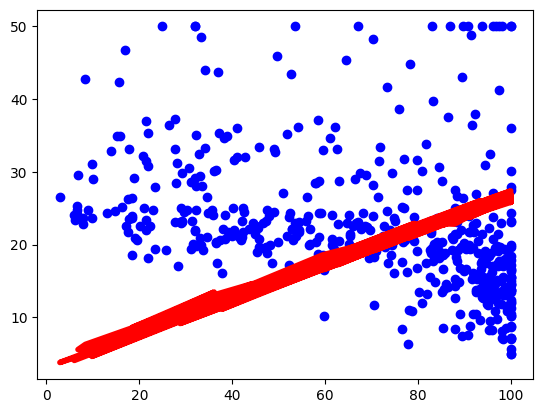

In [106]:
plt.scatter(X_train_2,Y_train,c='blue')
plt.plot(X_train_2,y_pred,c='red' , lw=4)

### The problem is not with the code, the problem is with the data. The data is completely flawed. If you find the correct data, test the correct data. I still say the problem is with the data. The data has a very big flaw.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

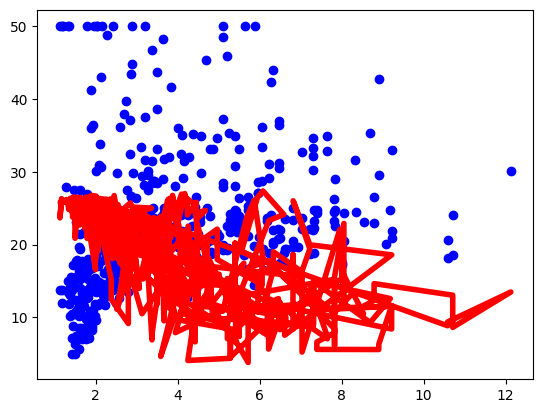

In [107]:
plt.scatter(X_train_3,Y_train,c='blue')
plt.plot(X_train_3,y_pred,c='red' , lw=4)

### The problem is not with the code, the problem is with the data. The data is completely flawed. If you find the correct data, test the correct data. I still say the problem is with the data. The data has a very big flaw.!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!